In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# Initialize lists for data storage
temps = []
humidity = []
cloudiness = []
wind = []
cities_found = []
country_found = []
lats_found = []
lngs_found = []
city_count = 1

# Loop through each city in original cities list
for city in cities:

    # Attempt to pull city data from the weather API
    try:
        city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
        response = requests.get(city_url).json()

        # If found, add data to respective lists
        temps.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lats_found.append(response['coord']['lat'])
        lngs_found.append(response['coord']['lon'])
        cities_found.append(city)
        country_found.append(response['sys']['country'])
        
        # Print the city and record number
        print(f'Record {city_count} for | {city}')
        city_count += 1        

    # If city is not found in API, print notice of that
    except:
        print(f'{city} not found. Continuing...')
        

Record 1 for | hithadhoo
Record 2 for | carnarvon
Record 3 for | yellowknife
Record 4 for | cherskiy
Record 5 for | maceio
mys shmidta not found. Continuing...
Record 6 for | marovoay
Record 7 for | tilichiki
Record 8 for | hofn
Record 9 for | marystown
Record 10 for | barrow
Record 11 for | busselton
Record 12 for | georgetown
Record 13 for | raga
Record 14 for | albany
yanan not found. Continuing...
Record 15 for | nyurba
Record 16 for | portoferraio
Record 17 for | puerto ayora
Record 18 for | butaritari
Record 19 for | beppu
Record 20 for | wewak
Record 21 for | cidreira
Record 22 for | tasiilaq
Record 23 for | karratha
Record 24 for | olavarria
Record 25 for | codrington
Record 26 for | husavik
kamenskoye not found. Continuing...
Record 27 for | jamestown
Record 28 for | cape town
Record 29 for | bud
belushya guba not found. Continuing...
Record 30 for | faanui
Record 31 for | yar-sale
taolanaro not found. Continuing...
Record 32 for | tutoia
Record 33 for | arraial do cabo
Record

Record 275 for | kerrobert
Record 276 for | port hawkesbury
Record 277 for | college
Record 278 for | aripuana
Record 279 for | ngunguru
Record 280 for | korhogo
Record 281 for | venice
Record 282 for | lamesa
tsihombe not found. Continuing...
Record 283 for | homer
Record 284 for | verkhnevilyuysk
Record 285 for | kloulklubed
Record 286 for | toba
Record 287 for | vanino
Record 288 for | waipawa
Record 289 for | constitucion
Record 290 for | mahebourg
Record 291 for | tucuman
kawana waters not found. Continuing...
Record 292 for | poronaysk
Record 293 for | upernavik
Record 294 for | zhanaozen
Record 295 for | zemetchino
toliary not found. Continuing...
Record 296 for | cairns
Record 297 for | necochea
Record 298 for | sukumo
of not found. Continuing...
Record 299 for | liverpool
Record 300 for | fatick
Record 301 for | abu samrah
Record 302 for | kieta
Record 303 for | kilindoni
Record 304 for | ust-nera
Record 305 for | moron
Record 306 for | taft
Record 307 for | muana
Record 308 f

Record 558 for | yerbogachen
Record 559 for | balabac
Record 560 for | leirvik
Record 561 for | magadan
Record 562 for | tura
Record 563 for | puteyets
Record 564 for | paracuru
Record 565 for | ambunti
Record 566 for | cotonou
Record 567 for | vega de alatorre


In [4]:
# print(f'{len(temps)}, {len[lats_found]}, {len(humidity)}, {len(cloudiness)}, {len(wind)}, {len(cities_found)}')

# Create Dataframe
weather_df = pd.DataFrame({'City':cities_found,
                           'Country':country_found,
                           'Latitude':lats_found,
                           'Longitude':lngs_found,
                           'Temperature (F)':temps,
                           'Humidity (%)':humidity,
                           'Cloudiness (%)':cloudiness,
                           'Wind Speed (mph)':wind})
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hithadhoo,MV,-0.6000,73.0833,82.31,64,10,4.83
1,carnarvon,AU,-24.8667,113.6333,62.60,67,0,5.75
2,yellowknife,CA,62.4560,-114.3525,9.90,52,40,13.80
3,cherskiy,RU,68.7500,161.3000,21.40,83,60,8.39
4,maceio,BR,-9.6658,-35.7353,77.00,88,0,6.91


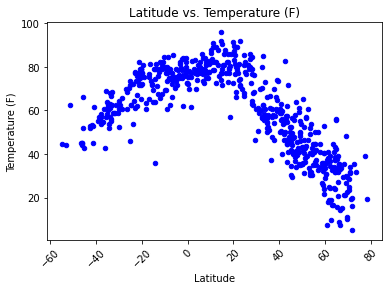

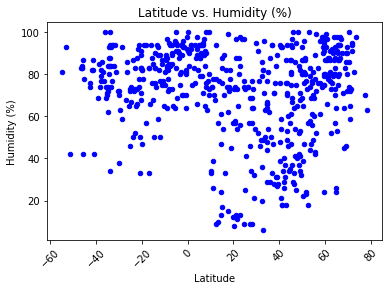

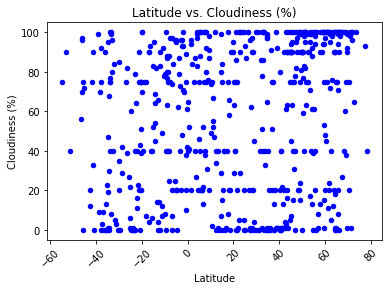

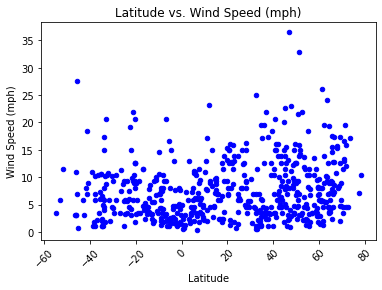

In [5]:
# Create Scatter Plot for Temp (F) vs Latitude
cols = ['Temperature (F)','Humidity (%)','Cloudiness (%)','Wind Speed (mph)']

for col in cols:
    weather_df.plot.scatter(x='Latitude',y=col,c='Blue',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col}', rot=45)


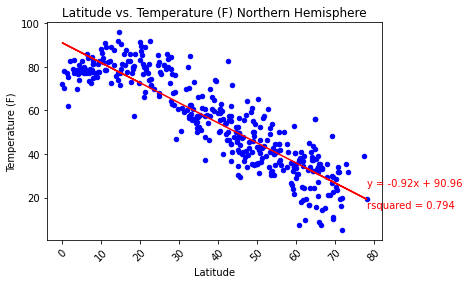

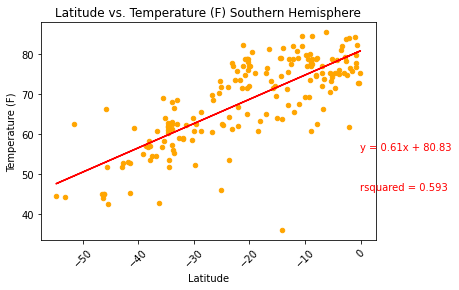

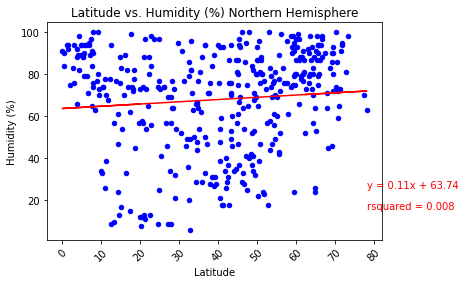

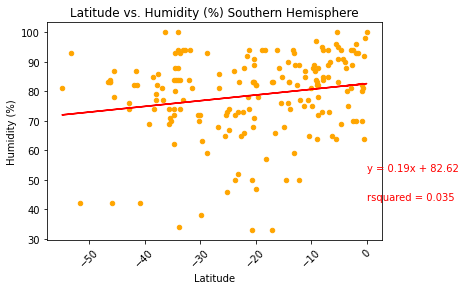

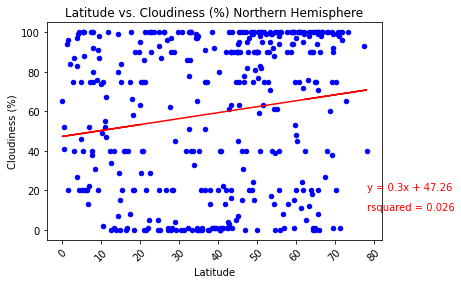

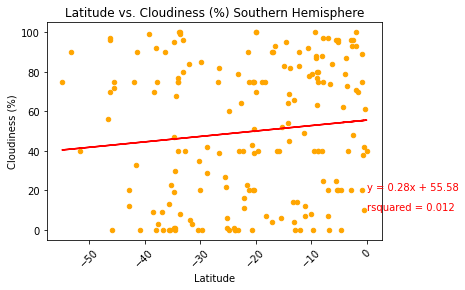

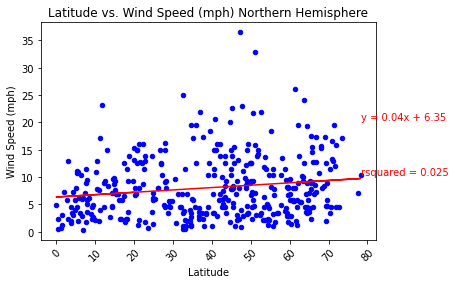

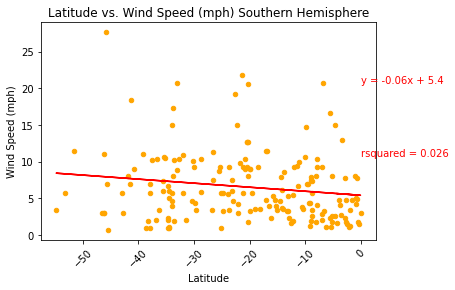

In [6]:
north_df = weather_df.loc[weather_df['Latitude'] > 0,:]
south_df = weather_df.loc[weather_df['Latitude'] < 0,:]

for col in cols:
    
    # Northern Hemisphere Analysis
    x_data_n = north_df['Latitude']
    y_data_n = north_df[col]
    correlation = st.pearsonr(x_data_n, y_data_n)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data_n, y_data_n)
    regress_values = x_data_n * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    # Plotting and formatting
    north_df.plot.scatter(x='Latitude',y=col,c='Blue',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col} Northern Hemisphere', rot=45)
    plt.plot(x_data_n,regress_values,'r')
    plt.annotate(line_eq, (max(x_data_n),min(y_data_n)+20), fontsize=10, color='red')
    plt.annotate(f"rsquared = {round(rvalue**2,3)}", (max(x_data_n),min(y_data_n)+10), fontsize=10, color='red')
    
    # Southern Hemisphere Analysis
    x_data_s = south_df['Latitude']
    y_data_s = south_df[col]
    correlation = st.pearsonr(x_data_s, y_data_s)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data_s, y_data_s)
    regress_values = x_data_s * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

    # Plotting and formatting
    south_df.plot.scatter(x='Latitude',y=col,c='Orange',
                       xlabel='Latitude',ylabel=col,
                       title=f'Latitude vs. {col} Southern Hemisphere', rot=45)
    plt.plot(x_data_s,regress_values,'r')
    plt.annotate(line_eq, (max(x_data_s),min(y_data_s)+20), fontsize=10, color='red')
    plt.annotate(f"rsquared = {round(rvalue**2,3)}", (max(x_data_s),min(y_data_s)+10), fontsize=10, color='red')


In [7]:
# Write all data to csv
weather_df.to_csv(output_data_file)